<a href="https://colab.research.google.com/github/PathanZeba/Trader-Behavior-vs-Market-Sentiment/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
historical = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

In [47]:
print("Historical Data:")
print(historical.head())

Historical Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order 

In [48]:
print("\nSentiment Data:")
print(sentiment.head())


Sentiment Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [49]:
print("Historical Data shape:", historical.shape)
print("Sentiment Data shape:", sentiment.shape)

Historical Data shape: (211224, 17)
Sentiment Data shape: (2644, 4)


In [50]:
print("Historical Columns:", historical.columns.tolist())
print("Sentiment Columns:", sentiment.columns.tolist())


Historical Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date']
Sentiment Columns: ['timestamp', 'value', 'classification', 'date']


In [51]:
print("\nHistorical Data Info:")
print(historical.info())


Historical Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     79225 non-null   datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  f

In [54]:
print("\nSentiment Data:")
print(sentiment.head())


Sentiment Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [31]:
# Shape (rows, columns)
print("Historical Data shape:", historical.shape)
print("Sentiment Data shape:", sentiment.shape)

Historical Data shape: (211224, 16)
Sentiment Data shape: (2644, 4)


In [32]:

print("\nHistorical Data Info:")
print(historical.info())

print("\nSentiment Data Info:")
print(sentiment.info())


Historical Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dt

In [33]:
print("\nHistorical Data Describe:")
print(historical.describe())


Historical Data Describe:
       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.104100  

In [34]:
print("Historical Columns:", historical.columns.tolist())
print("Sentiment Columns:", sentiment.columns.tolist())


Historical Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Sentiment Columns: ['timestamp', 'value', 'classification', 'date']


In [35]:
historical['Timestamp IST'] = pd.to_datetime(historical['Timestamp IST'], errors='coerce')

historical['date'] = historical['Timestamp IST'].dt.date

sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date

print(historical[['Timestamp IST', 'date']].head())
print(sentiment[['date', 'classification']].head())


        Timestamp IST        date
0 2024-02-12 22:50:00  2024-02-12
1 2024-02-12 22:50:00  2024-02-12
2 2024-02-12 22:50:00  2024-02-12
3 2024-02-12 22:50:00  2024-02-12
4 2024-02-12 22:50:00  2024-02-12
         date classification
0  2018-02-01           Fear
1  2018-02-02   Extreme Fear
2  2018-02-03           Fear
3  2018-02-04   Extreme Fear
4  2018-02-05   Extreme Fear


In [55]:
merged = pd.merge(
    historical,
    sentiment[['date', 'classification', 'value']],
    on='date',
    how='left'
)

print("Merged Shape:", merged.shape)
print("Missing Values:\n", merged.isnull().sum())
print("Sentiment Classes:", merged['classification'].unique())

Merged Shape: (211224, 19)
Missing Values:
 Account                  0
Coin                     0
Execution Price          0
Size Tokens              0
Size USD                 0
Side                     0
Timestamp IST       131999
Start Position           0
Direction                0
Closed PnL               0
Transaction Hash         0
Order ID                 0
Crossed                  0
Fee                      0
Trade ID                 0
Timestamp                0
date                131999
classification      175360
value               175360
dtype: int64
Sentiment Classes: ['Greed' 'Extreme Greed' 'Fear' nan 'Extreme Fear' 'Neutral']


In [37]:
print("Merged Shape:", merged.shape)
print("Missing Values:\n", merged.isnull().sum())
print("Sentiment Classes:", merged['classification'].unique())


Merged Shape: (211224, 19)
Missing Values:
 Account                  0
Coin                     0
Execution Price          0
Size Tokens              0
Size USD                 0
Side                     0
Timestamp IST       131999
Start Position           0
Direction                0
Closed PnL               0
Transaction Hash         0
Order ID                 0
Crossed                  0
Fee                      0
Trade ID                 0
Timestamp                0
date                131999
classification      175360
value               175360
dtype: int64
Sentiment Classes: ['Greed' 'Extreme Greed' 'Fear' nan 'Extreme Fear' 'Neutral']


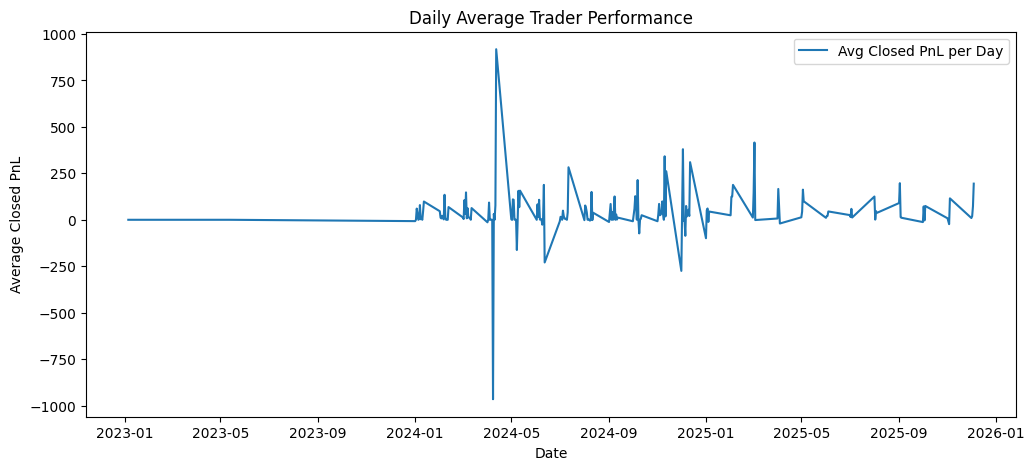

In [38]:
daily_pnl = merged.groupby('date')['Closed PnL'].mean()

plt.figure(figsize=(12,5))
plt.plot(daily_pnl.index, daily_pnl.values, label="Avg Closed PnL per Day")
plt.xlabel("Date")
plt.ylabel("Average Closed PnL")
plt.title("Daily Average Trader Performance")
plt.legend()
plt.show()


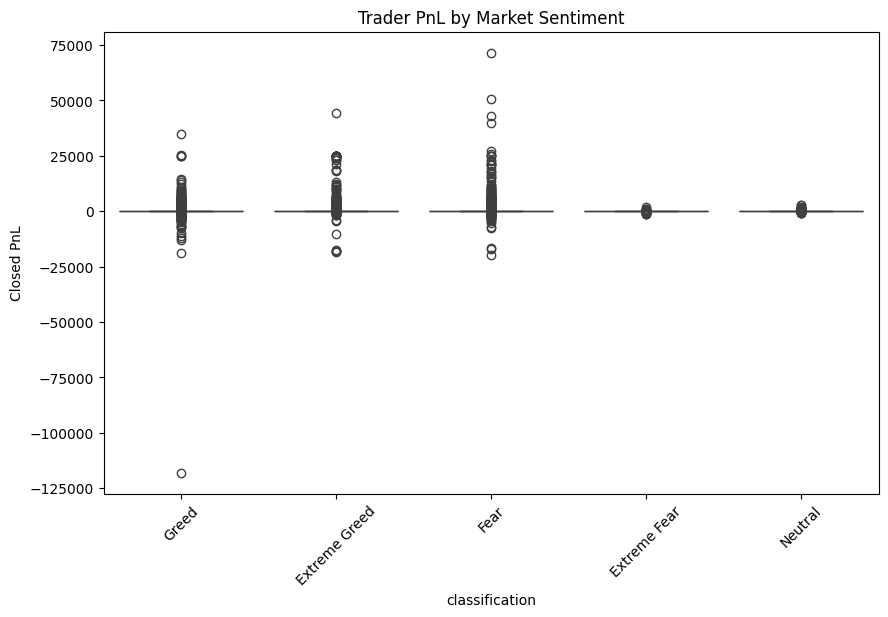

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged, x="classification", y="Closed PnL")
plt.xticks(rotation=45)
plt.title("Trader PnL by Market Sentiment")
plt.show()


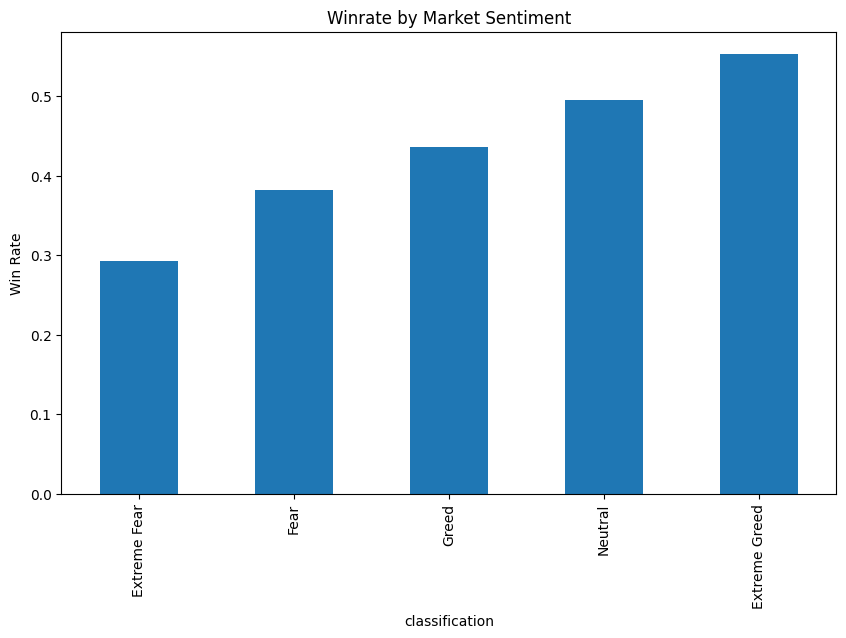

In [40]:
# Win = PnL > 0
merged['Win'] = merged['Closed PnL'] > 0

winrate = merged.groupby('classification')['Win'].mean().sort_values()

plt.figure(figsize=(10,6))
winrate.plot(kind="bar")
plt.title("Winrate by Market Sentiment")
plt.ylabel("Win Rate")
plt.show()


In [56]:
cols_to_check = ['Closed PnL', 'Size USD', 'Fee']
available_cols = [col for col in cols_to_check if col in merged.columns]

In [41]:
sentiment_stats = merged.groupby('classification')[['Closed PnL', 'Size USD', 'Fee']].mean().round(2)
print(sentiment_stats)


                Closed PnL  Size USD   Fee
classification                            
Extreme Fear          1.89   4118.76  0.69
Extreme Greed       205.82   3242.09  0.84
Fear                128.29   5744.78  1.13
Greed                53.99   5051.88  1.09
Neutral              27.09   4332.20  0.92


In [42]:
print(merged.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'classification', 'value', 'Win']


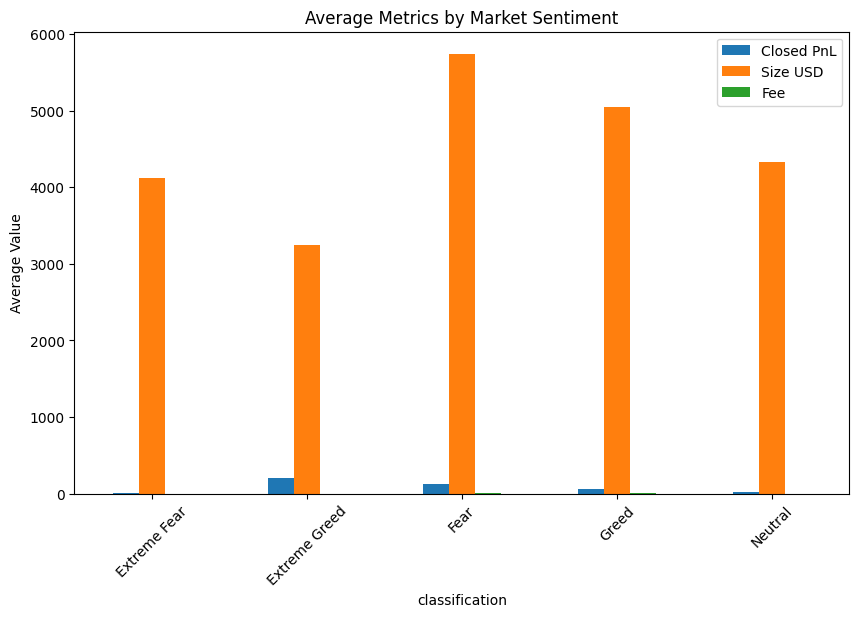

In [57]:
sentiment_stats.plot(kind='bar', figsize=(10,6))
plt.title("Average Metrics by Market Sentiment")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

In [43]:

if 'merged' not in locals():
    merged = pd.merge(
        historical,
        sentiment[['date', 'classification', 'value']],
        on='date',
        how='left'
    )


cols_to_check = ['Closed PnL', 'Size USD', 'Fee']
available_cols = [col for col in cols_to_check if col in merged.columns]

sentiment_stats = merged.groupby('classification')[available_cols].mean().round(2)
print(sentiment_stats)


                Closed PnL  Size USD   Fee
classification                            
Extreme Fear          1.89   4118.76  0.69
Extreme Greed       205.82   3242.09  0.84
Fear                128.29   5744.78  1.13
Greed                53.99   5051.88  1.09
Neutral              27.09   4332.20  0.92


In [59]:
merged['sentiment_bucket'] = pd.cut(
    merged['value'],
    bins=[0, 30, 60, 100],
    labels=['Low', 'Medium', 'High']
)

bucket_stats = merged.groupby('sentiment_bucket')[['Closed PnL', 'Size USD', 'Fee']].mean().round(2)
print(bucket_stats)


                  Closed PnL  Size USD   Fee
sentiment_bucket                            
Low                    64.68   5181.88  0.89
Medium                134.72   5239.06  1.16
High                  101.64   4518.29  1.02


/tmp/ipython-input-1172412194.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_stats = merged.groupby('sentiment_bucket')[['Closed PnL', 'Size USD', 'Fee']].mean().round(2)


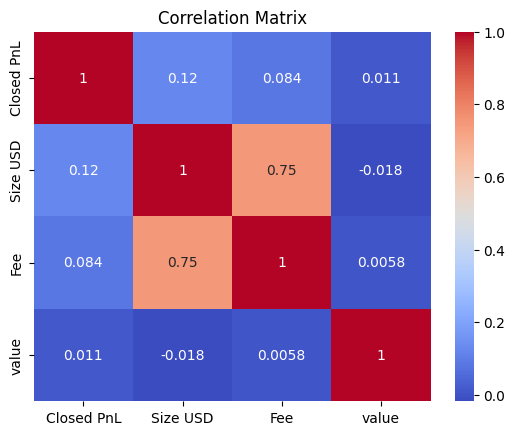

In [60]:
corr = merged[['Closed PnL', 'Size USD', 'Fee', 'value']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


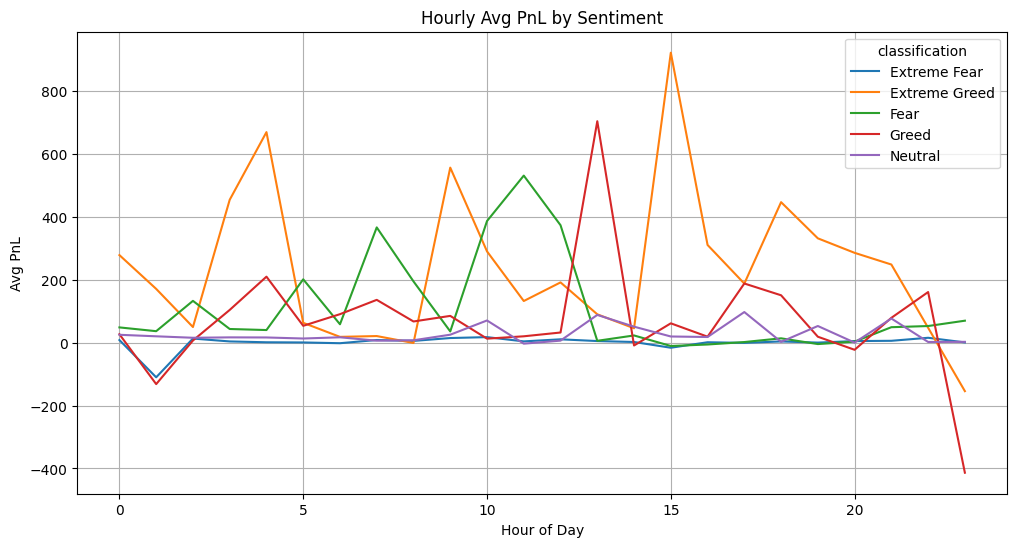

In [61]:
merged['hour'] = pd.to_datetime(merged['Timestamp IST'], errors='coerce').dt.hour
hourly_sentiment_pnl = merged.groupby(['hour', 'classification'])['Closed PnL'].mean().unstack()

hourly_sentiment_pnl.plot(figsize=(12,6))
plt.title("Hourly Avg PnL by Sentiment")
plt.xlabel("Hour of Day")
plt.ylabel("Avg PnL")
plt.grid(True)
plt.show()


In [62]:
trader_perf = merged.groupby(['Account', 'classification'])['Closed PnL'].mean().unstack()
trader_perf['consistency'] = trader_perf.min(axis=1)
top_consistent = trader_perf.sort_values(by='consistency', ascending=False).head(10)
print(top_consistent)


classification                              Extreme Fear  Extreme Greed  \
Account                                                                   
0x92f17e8d81a944691c10e753af1b1baae1a2cd0d           NaN            NaN   
0x271b280974205ca63b716753467d5a371de622ab           NaN            NaN   
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4           NaN      59.249039   
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f     36.068831            NaN   
0xb899e522b5715391ae1d4f137653e7906c5e2115     15.044644            NaN   
0x6d6a4b953f202f8df5bed40692e7fd865318264a     14.901568      88.404253   
0x47add9a56df66b524d5e2c1993a43cde53b6ed85      7.359550       4.257006   
0xbaaaf6571ab7d571043ff1e313a9609a10637864      4.129358            NaN   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4      2.598012      41.035811   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4      0.000000            NaN   

classification                                    Fear       Greed  \
Account                      